# 3.1

In [15]:
import pandas as pd
gold_data = pd.read_csv('GOLD.csv')
gold_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [16]:
gold_data.set_index('Date',inplace=True)
gold_data

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


In [17]:
gold_without_nan = gold_data.dropna()
gold_without_nan

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Dec 04, 2018",30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081
"Dec 05, 2018",30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101
"Dec 06, 2018",31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186


Slope: [[-0.00823083]]
Intercept: [343.67028421]
Root mean squared error:  73300.46132887459
R2 score:  3.732507600850976e-05


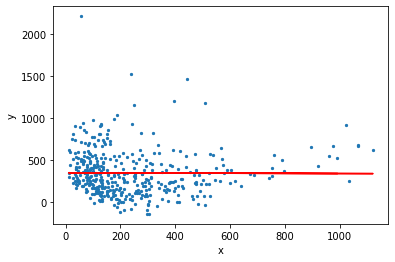

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#dataset
y = np.array(gold_without_nan["Pred"])
x = np.array(gold_without_nan["new"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# sckit-learn implementation
# Model initialization

regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
plt.scatter(x, y, s=5)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

In [38]:
gold_data=gold_data.reset_index(level='Date')
pre_data = gold_data[:]
pre_data_new = pre_data['new']
pre_data_new = pre_data_new.values.reshape(-1,1)
na_data = (regression_model.predict(pre_data_new))
na_data_series = pd.Series(na_data.ravel())
sata = na_data_series.to_frame()
gold_data['Pred']=sata
gold_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,342.702580,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,341.238649,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,342.582797,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,342.836517,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,342.747169,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,341.635810,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,343.240625,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,342.737786,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,343.272194,48.365693


Slope: [[-121.49444741]]
Intercept: [41754.03127127]
Root mean squared error:  1.2291678799353053e-23
R2 score:  1.0


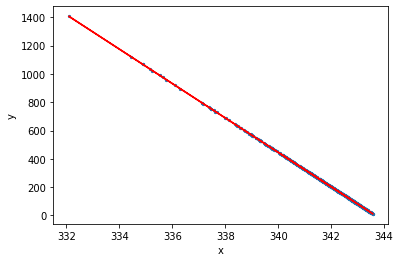

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#dataset
y = np.array(gold_data['new'])
x = np.array(gold_data['Pred'])
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# sckit-learn implementation
# Model initialization

regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
plt.scatter(x, y, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_predicted, color='r')
plt.show()

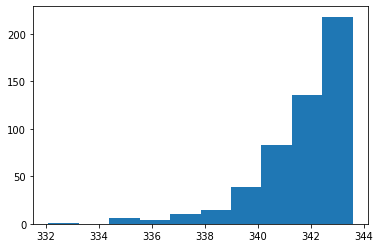

In [40]:
import matplotlib.pyplot as plt
plt.hist(gold_data['Pred'])
plt.show()

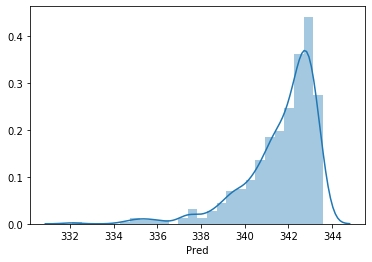

In [41]:
import seaborn as sns
sns.distplot(gold_data['Pred'])
plt.show()

# 3.2

In [42]:
tcs_data = pd.read_csv('tcs_stock_data.csv')
tcs_data['Date'] = pd.to_datetime(tcs_data['Date'])
tcs_data = tcs_data.sort_values('Date')
tcs_data.set_index('Date', inplace=True)
tcs_data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-07-06,TCS,EQ,2356.00,2359.0,2361.90,2340.10,2350.05,2347.55,2348.75,513394,1.205835e+09,26826,342973,66.81
2017-07-07,TCS,EQ,2347.55,2350.0,2356.45,2325.50,2332.00,2331.95,2343.49,616045,1.443698e+09,52731,417958,67.85
2017-07-10,TCS,EQ,2331.95,2341.0,2444.90,2341.00,2435.00,2434.95,2426.54,398392,9.667144e+08,12486,188289,47.26
2017-07-11,TCS,EQ,2434.95,2426.0,2514.80,2426.00,2482.50,2475.80,2478.13,1768752,4.383195e+09,96054,937311,52.99
2017-07-12,TCS,EQ,2475.80,2482.5,2483.30,2430.10,2441.00,2439.45,2453.34,1323225,3.246316e+09,62259,926229,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,TCS,EQ,2227.20,2235.0,2255.00,2206.60,2233.05,2239.55,2237.15,2769940,6.196759e+09,129268,1579799,57.03
2019-07-02,TCS,EQ,2239.55,2244.9,2257.00,2216.45,2254.30,2252.10,2237.79,1771746,3.964797e+09,97184,816451,46.08
2019-07-03,TCS,EQ,2252.10,2252.2,2258.80,2232.00,2234.00,2237.65,2242.16,1656881,3.714997e+09,87941,739089,44.61


In [43]:
nifty_data = pd.read_csv('NIFTY50_Data.csv')
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data = nifty_data.sort_values('Date')
nifty_data.set_index('Date', inplace=True)
nifty_data

,Open,High,Low,Close
Date,,,,
2017-07-06,9653.60,9700.70,9639.95,9674.55
2017-07-07,9670.35,9684.25,9642.65,9665.80
2017-07-10,9719.30,9782.15,9646.45,9771.05
2017-07-11,9797.45,9830.05,9778.85,9786.05
2017-07-12,9807.30,9824.95,9787.70,9816.10
...,...,...,...,...
2019-07-01,11839.90,11884.65,11830.80,11865.60
2019-07-02,11890.30,11917.45,11814.70,11910.30
2019-07-03,11932.15,11945.20,11887.05,11916.75


In [44]:
fil_tcs = tcs_data[405:]
fil_nifty = nifty_data[405:]

In [45]:
return_tcs = fil_tcs['Close Price'].pct_change()
return_nifty = fil_nifty['Close'].pct_change()

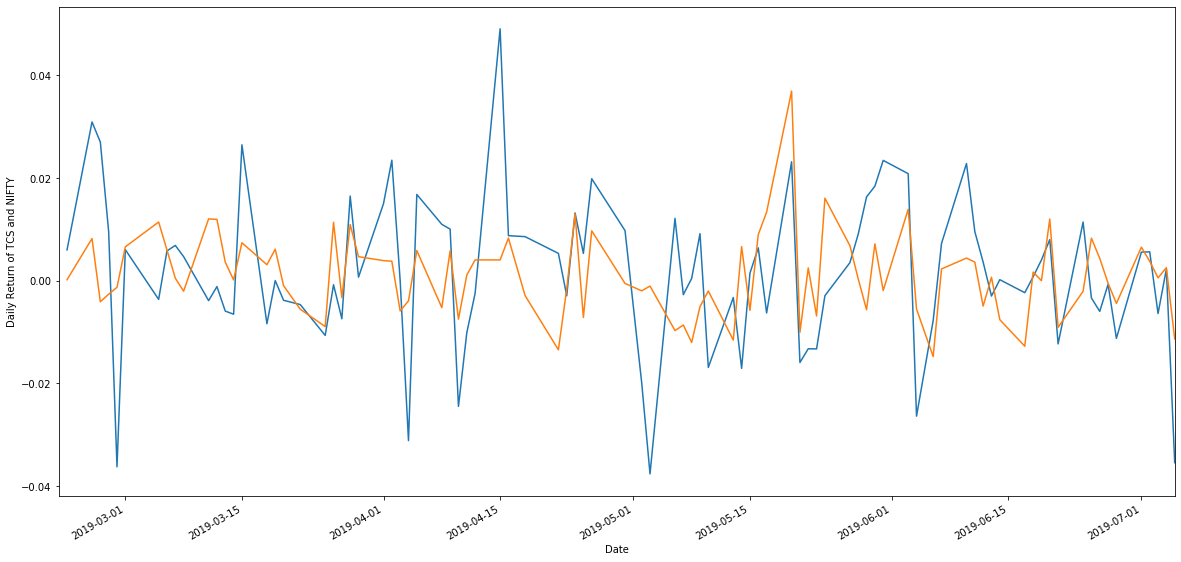

In [46]:
plt.figure(figsize=(20,10))
return_tcs.plot()
return_nifty.plot()
plt.ylabel("Daily Return of TCS and NIFTY")
plt.show()

In [47]:
fil_tcs['pct_change'] = fil_tcs['Close Price'].pct_change()
fil_nifty['pct_change'] = fil_nifty['Close'].pct_change()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
x = fil_tcs['pct_change'].dropna()
y = fil_nifty['pct_change'].dropna()
import pandas as pd 
import statsmodels.api as sm
myModel = sm.OLS(y,x).fit()
myModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pct_change   R-squared (uncentered):                   0.129
Model:                            OLS   Adj. R-squared (uncentered):              0.119
Method:                 Least Squares   F-statistic:                              13.05
Date:                Sat, 27 Jun 2020   Prob (F-statistic):                    0.000504
Time:                        22:49:03   Log-Likelihood:                          307.80
No. Observations:                  89   AIC:                                     -613.6
Df Residuals:                      88   BIC:                                     -611.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pct_change     0.1968      0.054      3.613      0.001       0.089       0.305
==============================================================================
Omnibus:                       14.792   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.676
Skew:                           0.699   Prob(JB):                     1.19e-05
Kurtosis:                       5.039   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
import pandas as pd
import statsmodels.api as sm

'''
Download monthly prices of TCS and NIFTY 50 for Time period: 1-Jan-2014--12-Jan-2017
'''
tcs = pd.read_csv('TCS.NS.csv', parse_dates=True, index_col='Date',)
nifty50 = pd.read_csv('^NSEI.csv', parse_dates=True, index_col='Date')

# joining the closing prices of the two datasets 
monthly_prices = pd.concat([tcs['Close'], nifty50['Close']], axis=1)
monthly_prices.columns = ['TCS', 'NIFTY50']

# check the head of the dataframe
print(monthly_prices.head())

# calculate monthly returns
monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  # drop first missing row
print(clean_monthly_returns.head())

                    TCS       NIFTY50
Date                                 
2018-06-30          NaN           NaN
2018-07-31  2078.399902  11680.500000
2018-08-31  2183.699951  10930.450195
2018-09-30  1938.150024  10386.599609
2018-10-31  1968.250000  10876.750000
                 TCS   NIFTY50
Date                          
2018-08-31  0.050664 -0.064214
2018-09-30 -0.112447 -0.049756
2018-10-31  0.015530  0.047191
2018-11-30 -0.038207 -0.001306
2018-12-31  0.063944 -0.002909


In [51]:
X = clean_monthly_returns['TCS']
y = clean_monthly_returns['NIFTY50']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                NIFTY50   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.4814
Date:                Sat, 27 Jun 2020   Prob (F-statistic):              0.504
Time:                        23:05:05   Log-Likelihood:                 23.106
No. Observations:                  12   AIC:                            -42.21
Df Residuals:                      10   BIC:                            -41.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.011     -0.093      0.9